## Cluster analysis of sources data

Built by Rebeckah Fussell based off of code written by Halvor Tyseng, Markus Fleten Kreutzer, and Jonas Timmann Mjaaland. 

In [43]:
# Import basic libraries
import numpy as np
import pandas as pd
import scipy as sc

# Import libraries for measuring performance
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score

# Import libraries for TSNE
from sklearn.manifold import TSNE

# Import libraries for plotting
import plotly.express as px
import matplotlib.pyplot as plt

Take in the embedded data that we created in the "create_embedding_sources.ipynb" notebook. Store the data in a pandas dataframe.

In [44]:
# Import the data
df = pd.read_pickle('embedded_data/sources_embedding.pkl')
df

,Unnamed: 0.1,Unnamed: 0,DataSource,ResponseId,response,code,Experiment,updated_code,embedding
0,0,0,Cornell pilot,R_1NCwF6OCsamZgEn,Imprecise/faulty measuring tools,L,PM,L,"[0.6306665539741516, -0.41385510563850403, 0.3..."
1,1,1,Cornell pilot,R_1JCQsbN3AZRJs8w,air fluctuations,L,PM,L,"[-0.0932486355304718, 1.1261245012283325, -0.2..."
2,2,2,Cornell pilot,R_3Mg3lCeyGGJa7zz,Slight differences in experimental setup: tabl...,L,PM,L,"[-0.16222825646400452, 0.2920781373977661, 0.4..."
3,3,3,Cornell pilot,R_2BlKRWOX8nmOP8j,The material of ramp and ball and the coeffici...,L,PM,L,"[-0.37404900789260864, 0.7872780561447144, 0.3..."
4,4,4,Cornell pilot,R_2Vx7PHIwsvICNoB,Materials issues (ball; ramps are identical),L,PM,L,"[-0.47330570220947266, 0.5216509103775024, 0.1..."
...,...,...,...,...,...,...,...,...,...
2894,2894,80,Boulder (spring),R_SSRapMZ3dB2gka5,imperfections in detection screen,L,SS,L,"[-0.4983749985694885, -0.8703764081001282, 0.2..."
2895,2895,152,San Jose,R_PGlUXsoV803pxS1,differences in the set up between groups (not ...,L,SS,L,"[0.22701393067836761, -0.347856342792511, -0.3..."
2896,2896,63,Boulder (spring),R_1H6pS3lVsORv4CC,Cosmic ray interference,L,SS,L,"[-0.04747126251459122, 0.4131532311439514, -0...."
2897,2897,80,Boulder (spring),R_SSRapMZ3dB2gka5,ruler differences,L,SS,L,"[0.06987995654344559, -0.760776698589325, 0.41..."


We drop columns we do not need. 

In [45]:
# Drop all columns except the response, code, and embedding
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','DataSource', 'ResponseId', 'Experiment'], inplace=True)
df

,response,code,updated_code,embedding
0,Imprecise/faulty measuring tools,L,L,"[0.6306665539741516, -0.41385510563850403, 0.3..."
1,air fluctuations,L,L,"[-0.0932486355304718, 1.1261245012283325, -0.2..."
2,Slight differences in experimental setup: tabl...,L,L,"[-0.16222825646400452, 0.2920781373977661, 0.4..."
3,The material of ramp and ball and the coeffici...,L,L,"[-0.37404900789260864, 0.7872780561447144, 0.3..."
4,Materials issues (ball; ramps are identical),L,L,"[-0.47330570220947266, 0.5216509103775024, 0.1..."
...,...,...,...,...
2894,imperfections in detection screen,L,L,"[-0.4983749985694885, -0.8703764081001282, 0.2..."
2895,differences in the set up between groups (not ...,L,L,"[0.22701393067836761, -0.347856342792511, -0.3..."
2896,Cosmic ray interference,L,L,"[-0.04747126251459122, 0.4131532311439514, -0...."
2897,ruler differences,L,L,"[0.06987995654344559, -0.760776698589325, 0.41..."


Print the number of responses for each code.

In [46]:
# Print the number of responses for each code
print("The number of responses for each code is:")
print(df['code'].value_counts())

The number of responses for each code is:
code
L    2228
O     408
P     161
S     102
Name: count, dtype: int64


In [47]:
# Print the number of responses for each code
print("The number of responses for each code is:")
print(df['updated_code'].value_counts())

The number of responses for each code is:
updated_code
L    2212
O     410
P     160
S     117
Name: count, dtype: int64


In [48]:
# Drop the responses that have been coded as "O" in the original dataset
#df_new = df[df['code'] != 'O']

We use TSNE to visualize the space. 

In [49]:
embedding_matrix = np.vstack(df["embedding"].values)
embedding_2D = TSNE(n_components=2, random_state=0).fit_transform(embedding_matrix)

tsne_df = pd.DataFrame(embedding_2D, columns=['x', 'y'])

In [51]:
embedding_matrix.shape

(2899, 1024)

In [ ]:
Perform cluster analysis. 

In [50]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

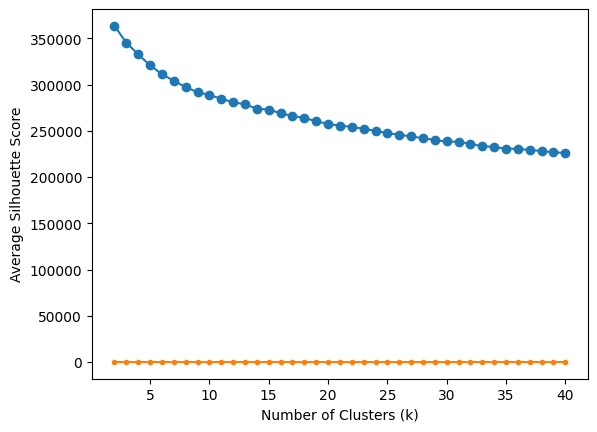

In [52]:
#inertia elbow
inertia_values = []
k_range = range(2, 41)  # Try different numbers of clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init is important for convergence
    kmeans.fit(embedding_matrix)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
#plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
#plt.show()
plt.savefig("inertia_elbow.png")


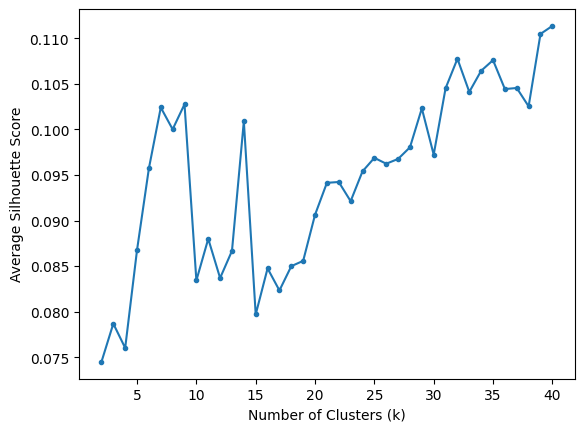

In [53]:
# Silhouette
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(embedding_matrix)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(embedding_matrix, labels))

plt.plot(k_range, silhouette_scores, marker='.')
#plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
#plt.show()
plt.savefig("silhouette.png")

In [54]:
# Elbow Method
inertia_values = []
k_range = range(2, 41)  # Try different numbers of clusters

k = 14


kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init is important for convergence
kmeans.fit(embedding_matrix)
inertia_values.append(kmeans.inertia_)
labels = kmeans.labels_


In [55]:
df["kmeans_labels"] = labels

In [56]:
## Initialize DBSCAN
#dbscan = DBSCAN(eps=10, min_samples=7)

## Fit and predict clusters
#clusters = dbscan.fit_predict(embedding_matrix)

#df["dbscan_labels"]  =  clusters

In [57]:
#df["dbscan_labels"].value_counts()

In [58]:
## Fit a GMM with 2 components
#gmm = GaussianMixture(n_components=20)
#gmm.fit(embedding_matrix)

## Predict cluster labels
#labels = gmm.predict(embedding_matrix)

## Get cluster centers
#centers = gmm.means_

#print("Cluster Centers:", centers)

#df["gmm_labels"]  =  labels

In [59]:
#df["gmm_labels"].value_counts()

In [60]:
#import time

In [61]:
#spectral = SpectralClustering(n_clusters=5, assign_labels='discretize', random_state=0)

In [62]:
#start_time = time.time()
#spectral.fit(embedding_matrix)
#end_time = time.time()
#elapsed_time = end_time - start_time
#print(f"Elapsed time: {elapsed_time} seconds")

In [63]:
#labels = spectral.labels_
#df["spectral_labels"]  =  labels

In [64]:
tsne_df['code'] = df['updated_code']
tsne_df['response'] = df['response']
tsne_df['cluster'] = df['kmeans_labels']
#tsne_df['cluster'] = df['dbscan_labels']
#tsne_df['cluster'] = df['gmm_labels']
#tsne_df['cluster'] = df['spectral_labels']
#tsne_df['cluster'] = tsne_df['cluster'].astype("str")

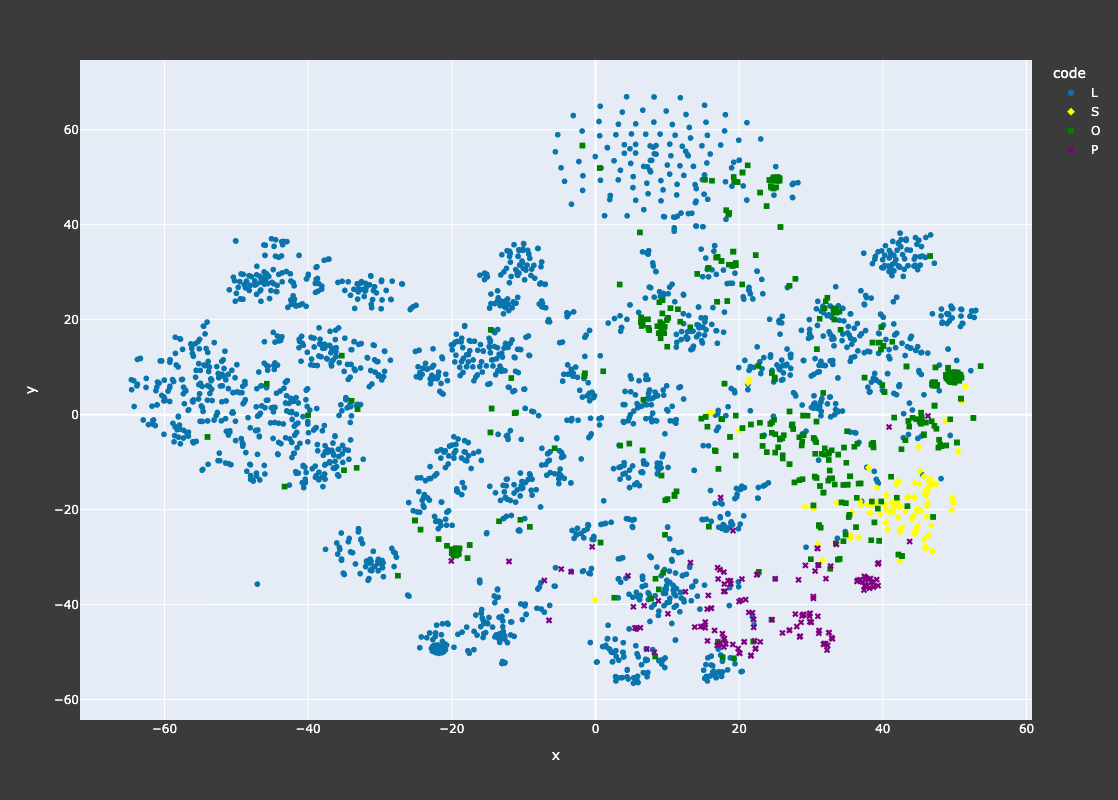

In [65]:
fig = px.scatter(tsne_df, x='x', y='y', color="code", hover_data=['response'], symbol="code",
                 color_discrete_map={'O': '#008000', 'L': '#0a75ad','P': '#800080', 'S': '#ffff00'})
fig.update_layout(width=800, height=800, paper_bgcolor='#3b3b3b',  font=dict(color='white'))

fig.show()

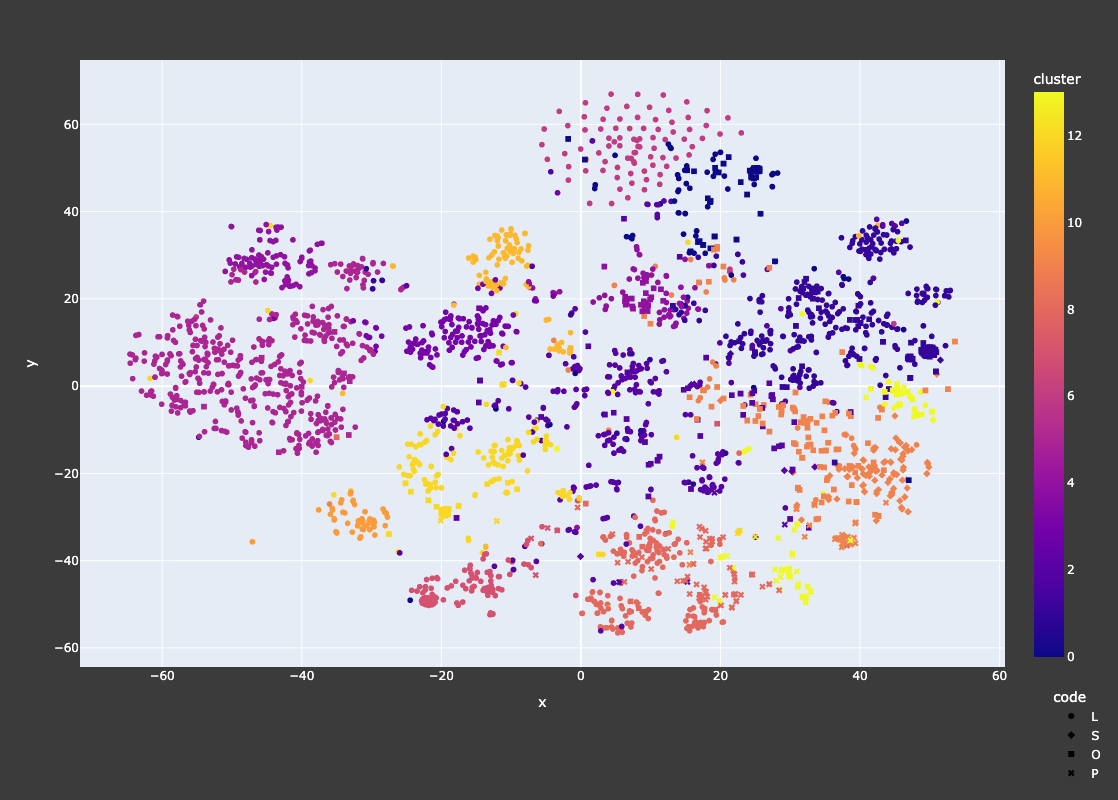

In [66]:
fig = px.scatter(tsne_df, x='x', y='y', color="cluster", hover_data=['response'], symbol="code")
#color_discrete_map={'O': '#008000', 'L': '#0a75ad','P': '#800080', 'S': '#ffff00'})
fig.update_layout(width=800, height=800, paper_bgcolor='#3b3b3b',  font=dict(color='white'), legend=dict(
        x=1.05,  # Position to the right of the plot
        y=-0.2,
        traceorder='normal',bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    ))

fig.show()


In [67]:
df

,response,code,updated_code,embedding,kmeans_labels
0,Imprecise/faulty measuring tools,L,L,"[0.6306665539741516, -0.41385510563850403, 0.3...",1
1,air fluctuations,L,L,"[-0.0932486355304718, 1.1261245012283325, -0.2...",7
2,Slight differences in experimental setup: tabl...,L,L,"[-0.16222825646400452, 0.2920781373977661, 0.4...",5
3,The material of ramp and ball and the coeffici...,L,L,"[-0.37404900789260864, 0.7872780561447144, 0.3...",3
4,Materials issues (ball; ramps are identical),L,L,"[-0.47330570220947266, 0.5216509103775024, 0.1...",5
...,...,...,...,...,...
2894,imperfections in detection screen,L,L,"[-0.4983749985694885, -0.8703764081001282, 0.2...",2
2895,differences in the set up between groups (not ...,L,L,"[0.22701393067836761, -0.347856342792511, -0.3...",2
2896,Cosmic ray interference,L,L,"[-0.04747126251459122, 0.4131532311439514, -0....",8
2897,ruler differences,L,L,"[0.06987995654344559, -0.760776698589325, 0.41...",2


In [72]:
# Count the number of data points in each cluster
cluster_sizes = df['kmeans_labels'].value_counts().sort_index()

# Create a contingency table of category counts per cluster
category_counts = pd.crosstab(df['kmeans_labels'], df['updated_code'])

# Convert counts to percentages per row
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0)

# Combine sizes and percentages into a single DataFrame
summary = category_percentages.copy()
summary.insert(0, 'count', cluster_sizes)

# Optional: round the percentages
summary = summary.round(2)

In [73]:
summary

updated_code,count,L,O,P,S
kmeans_labels,,,,,
0,137,0.55,0.45,0.00,0.00
1,396,0.79,0.20,0.00,0.01
2,344,0.83,0.13,0.01,0.03
3,153,0.99,0.01,0.00,0.00
4,182,0.86,0.14,0.00,0.00
5,507,0.98,0.02,0.00,0.00
6,90,1.00,0.00,0.00,0.00
7,117,0.95,0.01,0.04,0.00
8,241,0.71,0.05,0.24,0.00


In [98]:
pd.options.display.max_rows=1000
df[df["kmeans_labels"]==13]["response"]

15                                         Uncertainties 
199                                 Uncertainty Principle
256                        uncertainty in the meterstick,
280                                     imprecise reading
362                        experimental uncertainty/error
396                                 Uncertainty principle
511                                            Randomness
541                                            randomness
555                         Uncertainties in measurements
581                     randomness on the molecular level
582                  Uncertainty in 10s time measurement 
606     even if the experiment was designed to measure...
616                              uncertainty in the ruler
628                               measurement uncertainty
643     spin 1/2 particles may have some kind of uncer...
656                            Experimental uncertainties
661                                   Quantum uncertainty
663           

In [79]:
# Count the number of data points in each code
cluster_sizes = df['updated_code'].value_counts().sort_index()

# Create a contingency table of category counts per cluster
category_counts = pd.crosstab(df['updated_code'], df['kmeans_labels'])

# Convert counts to percentages per row
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0)

# Combine sizes and percentages into a single DataFrame
summary = category_percentages.copy()
summary.insert(0, 'count', cluster_sizes)

# Optional: round the percentages
summary = summary.round(2)

In [80]:
summary

kmeans_labels,count,0,1,2,3,4,5,6,7,8,9,10,11,12,13
updated_code,,,,,,,,,,,,,,,
L,2212,0.03,0.14,0.13,0.07,0.07,0.23,0.04,0.05,0.08,0.02,0.03,0.05,0.06,0.01
O,410,0.15,0.20,0.11,0.00,0.06,0.02,0.00,0.00,0.03,0.26,0.00,0.01,0.08,0.08
P,160,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.03,0.37,0.19,0.00,0.00,0.04,0.34
S,117,0.00,0.03,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.86,0.00,0.00,0.00,0.03
